##### Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, users are able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world whichis composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics ofdata being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into avirtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

### Hackathon_Bike_Shares (Multiple Linear Regression)
Author: Thilagavathy R Vasantharaja

### Import Libraries

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier

### Check train dataset

In [312]:
data_train = pd.read_csv("bike_train.csv")
data_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,01-01-2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
4,5,01-01-2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2


### Check test dataset

In [313]:
data_test = pd.read_csv("bike_test.csv")
data_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
1,2,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
2,3,01-01-2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000
3,4,01-01-2011,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537
4,5,01-01-2011,1,0,1,19,0,6,0,3,0.42,0.4242,0.88,0.2537


### Understanding the data

In [314]:
df=pd.concat([data_train,data_test])

In [315]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16.0
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40.0
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32.0
3,4,01-01-2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1.0
4,5,01-01-2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2.0


In [316]:
df.shape

(17379, 15)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 5744
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         11634 non-null  float64
dtypes: float64(5), int64(9), object(1)
memory usage: 2.1+ MB


In [318]:
mean_value=df['cnt'].mean()

In [319]:
df['cnt'].fillna(value=mean_value,inplace=True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 5744
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  float64
dtypes: float64(5), int64(9), object(1)
memory usage: 2.1+ MB


In [321]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,4844.132574,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,190.082173
std,3221.651382,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,149.128986
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2173.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,88.000000
50%,4345.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,190.082173
75%,7289.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,204.000000
max,11634.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,976.000000


<AxesSubplot:>

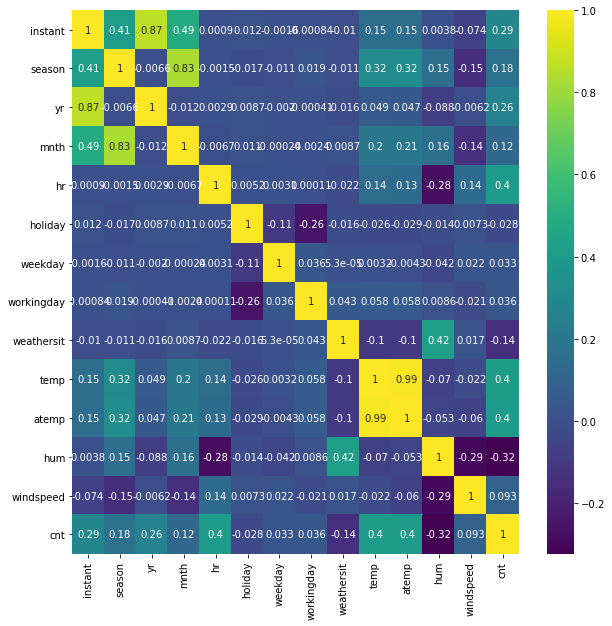

In [322]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(data_train.corr(), annot = True, cmap = "viridis")

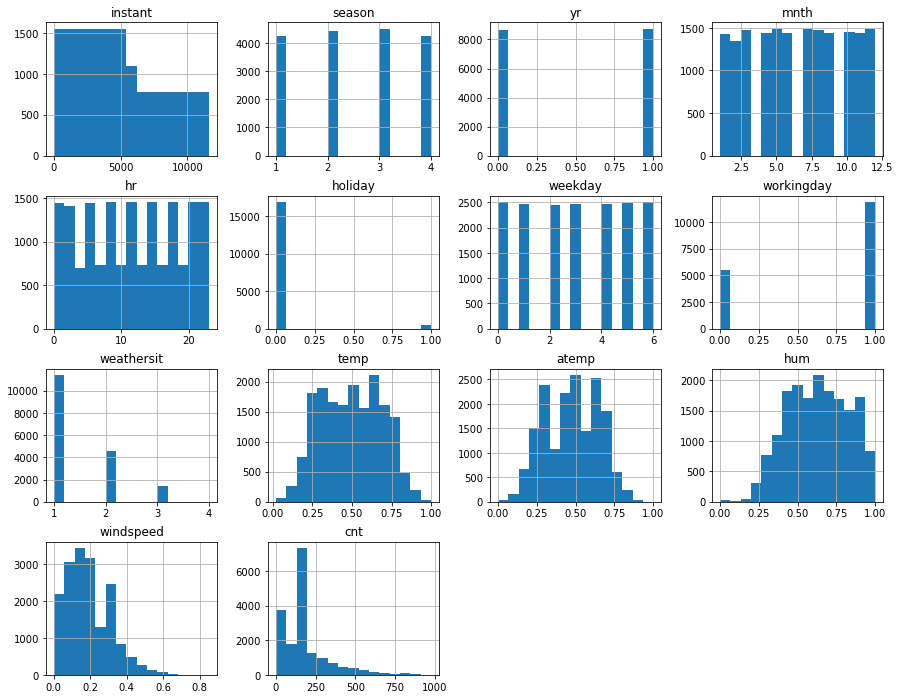

In [324]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### Check Null/Missing values

In [325]:
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [326]:
round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

0        0.0
11591    0.0
11577    0.0
11578    0.0
11579    0.0
        ... 
5798     0.0
5799     0.0
5800     0.0
5801     0.0
5744     0.0
Length: 17379, dtype: float64

### Duplicate Check

In [327]:
print(df.shape)

(17379, 15)


In [328]:
df_dup=df.copy()
df.drop_duplicates(subset=None,inplace=True)

In [329]:
df_dup.shape

(17379, 15)

### Data Cleaning

In [330]:
df1=df.iloc[:,2:15]

In [331]:
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32.0
3,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1.0
4,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2.0


In [332]:
for col in df1:
    print(df1[col].value_counts(ascending=False))

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
1    8734
0    8645
Name: yr, dtype: int64
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64
17    730
16    730
15    729
14    729
13    729
22    728
18    728
12    728
19    728
23    728
20    728
21    728
7     727
11    727
10    727
9     727
8     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
0    16879
1      500
Name: holiday, dtype: int64
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64
1    11865
0     5514
Name: workingday, dtype: int64
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.46    559
0.26    559
0.52    556
0.

In [333]:
df1.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Data Preprocessing

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.65, test_size = 0.35, random_state = 333)

In [336]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11296 entries, 4296 to 8172
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      11296 non-null  int64  
 1   yr          11296 non-null  int64  
 2   mnth        11296 non-null  int64  
 3   hr          11296 non-null  int64  
 4   holiday     11296 non-null  int64  
 5   weekday     11296 non-null  int64  
 6   workingday  11296 non-null  int64  
 7   weathersit  11296 non-null  int64  
 8   temp        11296 non-null  float64
 9   atemp       11296 non-null  float64
 10  hum         11296 non-null  float64
 11  windspeed   11296 non-null  float64
 12  cnt         11296 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.2 MB


In [337]:

df_train.shape

(11296, 13)

In [338]:
df_test.shape

(6083, 13)

### EXPLORATORY DATA ANALYSIS


In [339]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11296 entries, 4296 to 8172
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      11296 non-null  int64  
 1   yr          11296 non-null  int64  
 2   mnth        11296 non-null  int64  
 3   hr          11296 non-null  int64  
 4   holiday     11296 non-null  int64  
 5   weekday     11296 non-null  int64  
 6   workingday  11296 non-null  int64  
 7   weathersit  11296 non-null  int64  
 8   temp        11296 non-null  float64
 9   atemp       11296 non-null  float64
 10  hum         11296 non-null  float64
 11  windspeed   11296 non-null  float64
 12  cnt         11296 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.2 MB


In [340]:
df_train.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

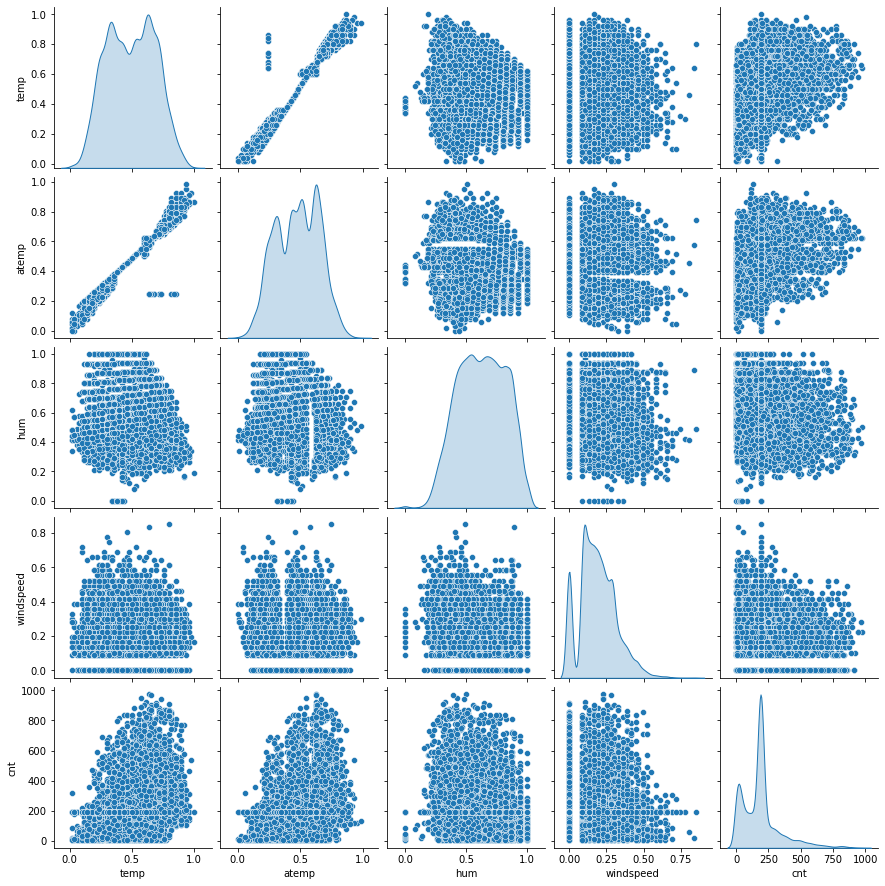

In [342]:
df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

### Visualising Catagorical VariableS

In [343]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11296 entries, 4296 to 8172
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      11296 non-null  int64  
 1   yr          11296 non-null  int64  
 2   mnth        11296 non-null  int64  
 3   hr          11296 non-null  int64  
 4   holiday     11296 non-null  int64  
 5   weekday     11296 non-null  int64  
 6   workingday  11296 non-null  int64  
 7   weathersit  11296 non-null  int64  
 8   temp        11296 non-null  float64
 9   atemp       11296 non-null  float64
 10  hum         11296 non-null  float64
 11  windspeed   11296 non-null  float64
 12  cnt         11296 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.2 MB


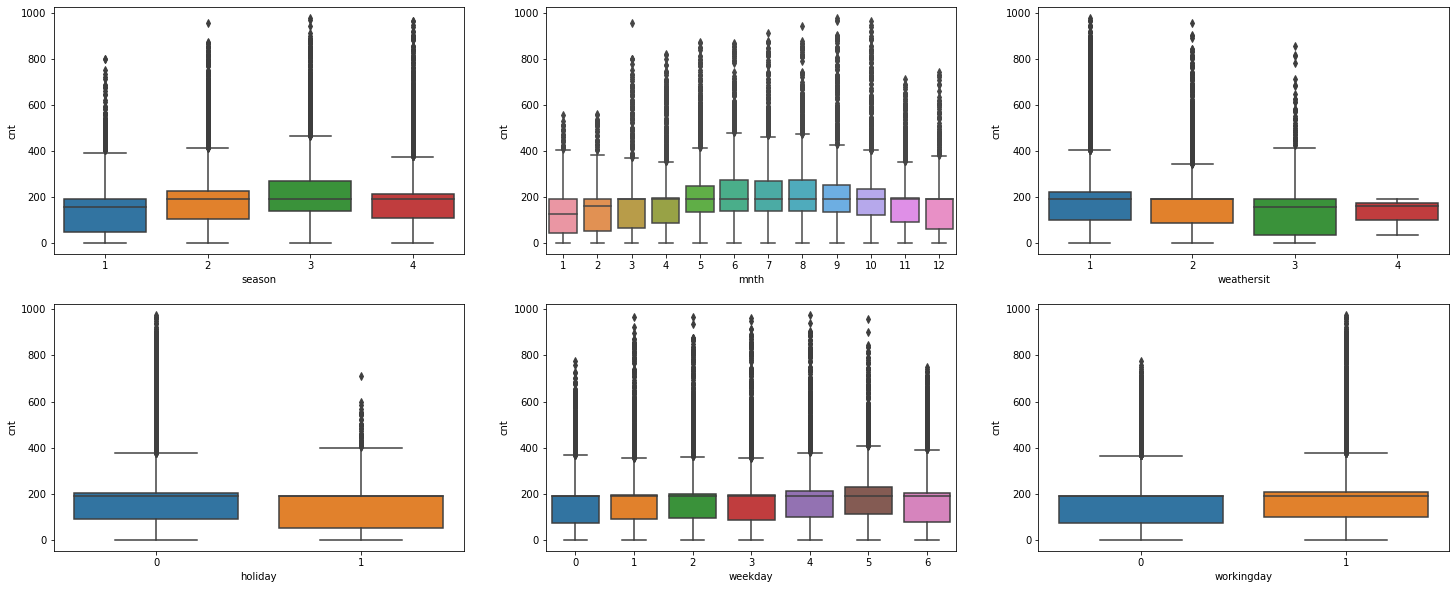

In [344]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data =df)
plt.show()

### RESCALING THE FEATURES


In [345]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Checking the values before scaling
df_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4296,4,0,9,18,0,5,1,1,0.58,0.5455,0.49,0.3582,511.000000
2915,1,1,1,5,0,0,0,2,0.32,0.3333,0.49,0.1045,190.082173
2320,4,0,10,16,0,1,1,1,0.54,0.5152,0.64,0.1940,190.082173
5664,1,0,12,16,0,6,0,1,0.32,0.3182,0.42,0.1940,99.000000
10759,4,1,11,18,0,2,1,1,0.32,0.3030,0.57,0.2985,497.000000


In [346]:
df_train.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [347]:
# Apply scaler() to all the numeric variables

num_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Checking values after scaling
df_train.head()

<ipython-input-347-4d71cb964c53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\vasanth\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4296,1.0,0.0,0.727273,0.782609,0.0,0.833333,1.0,0.000000,0.571429,0.553920,0.49,0.421065,0.523077
2915,0.0,1.0,0.000000,0.217391,0.0,0.000000,0.0,0.333333,0.306122,0.338444,0.49,0.122840,0.193930
2320,1.0,0.0,0.818182,0.695652,0.0,0.166667,1.0,0.000000,0.530612,0.523152,0.64,0.228047,0.193930
5664,0.0,0.0,1.000000,0.695652,0.0,1.000000,0.0,0.000000,0.306122,0.323111,0.42,0.228047,0.100513
10759,1.0,1.0,0.909091,0.782609,0.0,0.333333,1.0,0.000000,0.306122,0.307677,0.57,0.350888,0.508718


In [348]:
df_train.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,11296.000000,11296.000000,11296.000000,11296.000000,11296.00000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000
mean,0.499734,0.503807,0.504298,0.501840,0.02886,0.501195,0.679887,0.143679,0.484967,0.481702,0.627220,0.222405,0.193752
std,0.368661,0.500008,0.312877,0.300691,0.16742,0.334925,0.466541,0.214342,0.196753,0.174691,0.192387,0.143261,0.153229
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.272727,0.260870,0.00000,0.166667,0.000000,0.000000,0.326531,0.338444,0.480000,0.122840,0.088205
50%,0.333333,1.000000,0.545455,0.478261,0.00000,0.500000,1.000000,0.000000,0.489796,0.492283,0.630000,0.193018,0.193930
75%,0.666667,1.000000,0.818182,0.782609,0.00000,0.833333,1.000000,0.333333,0.653061,0.630788,0.780000,0.298225,0.208205
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a linear model

In [354]:
df1_train=df_train.copy()
df1_train.head()
#y_train = df_train.pop('cnt')
#X_train = df_train
#y_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4296,1.0,0.0,0.727273,0.782609,0.0,0.833333,1.0,0.000000,0.571429,0.553920,0.49,0.421065,0.523077
2915,0.0,1.0,0.000000,0.217391,0.0,0.000000,0.0,0.333333,0.306122,0.338444,0.49,0.122840,0.193930
2320,1.0,0.0,0.818182,0.695652,0.0,0.166667,1.0,0.000000,0.530612,0.523152,0.64,0.228047,0.193930
5664,0.0,0.0,1.000000,0.695652,0.0,1.000000,0.0,0.000000,0.306122,0.323111,0.42,0.228047,0.100513
10759,1.0,1.0,0.909091,0.782609,0.0,0.333333,1.0,0.000000,0.306122,0.307677,0.57,0.350888,0.508718


In [355]:

y_train = df1_train.pop('cnt')
X_train = df1_train

In [356]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
4296,1.0,0.0,0.727273,0.782609,0.0,0.833333,1.0,0.000000,0.571429,0.553920,0.49,0.421065
2915,0.0,1.0,0.000000,0.217391,0.0,0.000000,0.0,0.333333,0.306122,0.338444,0.49,0.122840
2320,1.0,0.0,0.818182,0.695652,0.0,0.166667,1.0,0.000000,0.530612,0.523152,0.64,0.228047
5664,0.0,0.0,1.000000,0.695652,0.0,1.000000,0.0,0.000000,0.306122,0.323111,0.42,0.228047
10759,1.0,1.0,0.909091,0.782609,0.0,0.333333,1.0,0.000000,0.306122,0.307677,0.57,0.350888


In [357]:
y_train.head()

4296     0.523077
2915     0.193930
2320     0.193930
5664     0.100513
10759    0.508718
Name: cnt, dtype: float64

### RFE
Recursive feature elimination: We will be using the LinearRegression
    function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [358]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [359]:

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\vasanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [360]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('hr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [361]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [362]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [423]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL

#### Model 1

#### VIF Check

In [424]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,368.34
8,temp,313.69
2,mnth,11.19
10,hum,10.14
0,season,9.50
3,hr,3.79
6,workingday,3.20
11,windspeed,3.14
5,weekday,3.06
1,yr,1.96


In [425]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [426]:
lr1.params

const         0.056491
season        0.040801
yr            0.060834
mnth         -0.002110
hr            0.123058
holiday      -0.013649
weekday       0.010429
workingday    0.005520
weathersit   -0.008972
temp          0.073340
atemp         0.135347
hum          -0.137434
windspeed     0.016503
dtype: float64

In [427]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     348.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:17:13   Log-Likelihood:                 6944.1
No. Observations:               11296   AIC:                        -1.386e+04
Df Residuals:                   11283   BIC:                        -1.377e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0565      0.008      6.690      0.0

### Model 2

##### NOTE: - Removing the variable 'atemp based on its High p-value & High VIF --

In [428]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

#### VIF Check

In [429]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mnth,11.18
0,season,9.50
9,hum,8.28
8,temp,7.27
3,hr,3.66
6,workingday,3.18
10,windspeed,3.12
5,weekday,3.05
1,yr,1.95
7,weathersit,1.77


In [430]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [431]:
# Check the parameters obtained

lr2.params

const         0.064819
season        0.041378
yr            0.060820
mnth         -0.002493
hr            0.123529
holiday      -0.014318
weekday       0.009999
workingday    0.005461
weathersit   -0.009941
temp          0.191734
hum          -0.136044
windspeed     0.010526
dtype: float64

In [432]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     379.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:17:34   Log-Likelihood:                 6940.3
No. Observations:               11296   AIC:                        -1.386e+04
Df Residuals:                   11284   BIC:                        -1.377e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0648      0.008      8.227      0.0

#### Model 3

#### NOTE: - Removing the variable 'mnth' based on its Very High 'VIF' value.

In [433]:
X_train_new = X_train_new.drop(["mnth"], axis = 1)

#### VIF Check

In [434]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,7.90
7,temp,7.24
2,hr,3.64
0,season,3.29
5,workingday,3.18
9,windspeed,3.11
4,weekday,3.04
1,yr,1.95
6,weathersit,1.77
3,holiday,1.10


In [435]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [436]:
# Check the parameters obtained

lr3.params

const         0.064485
season        0.039607
yr            0.060807
hr            0.123475
holiday      -0.014449
weekday       0.009953
workingday    0.005461
weathersit   -0.009935
temp          0.191989
hum          -0.136210
windspeed     0.010534
dtype: float64

In [437]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     417.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:17:54   Log-Likelihood:                 6940.3
No. Observations:               11296   AIC:                        -1.386e+04
Df Residuals:                   11285   BIC:                        -1.378e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0645      0.008      8.244      0.0

### Model 4
NOTE: - Removing the variable 'hum' based on its Very High 'P' value

In [438]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF

In [439]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,6.50
2,hr,3.63
8,windspeed,3.10
0,season,3.06
5,workingday,2.98
4,weekday,2.84
1,yr,1.93
6,weathersit,1.41
3,holiday,1.08


In [445]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [446]:
# Check the parameters obtained

lr4.params

const        -0.035845
season        0.030516
yr            0.064840
hr            0.144163
holiday      -0.014218
weekday       0.012492
workingday    0.005726
weathersit   -0.061075
temp          0.197830
windspeed     0.055860
dtype: float64

In [447]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     420.2
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:20:15   Log-Likelihood:                 6793.7
No. Observations:               11296   AIC:                        -1.357e+04
Df Residuals:                   11286   BIC:                        -1.349e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0358      0.005     -6.778      0.0

### Final Model Interpretation

Hypothesis Testing:

lr4 model coefficient values

const        -0.035845
season        0.030516
yr            0.064840
hr            0.144163
holiday      -0.014218
weekday       0.012492
workingday    0.005726
weathersit   -0.061075
temp          0.197830
windspeed     0.055860

### F statistic

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
F-statistic: 691.3
Prob (F-statistic): 0.00

### The equation of best fitted surface based on model lr4


cnt=-0.035845+(season×0.030516)+(yr×0.064840)+(hr×0.144163)−(holiday×0.014218)+(weekday×0.012492)+(workingday×0.005726)-(weathersit×-0.061075)+(temp×0.197830)+(windspeed×0.055860)

In [449]:
y_train_pred = lr4.predict(X_train_lm4)

In [450]:
y_train_pred.head()

4296     0.260197
2915     0.107399
2320     0.220476
5664     0.150233
10759    0.262385
dtype: float64

In [451]:
y_train_pred.shape

(11296,)

In [452]:
y_train.shape

(11296,)

In [453]:
y_train.head()

4296     0.523077
2915     0.193930
2320     0.193930
5664     0.100513
10759    0.508718
Name: cnt, dtype: float64

C:\Users\vasanth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

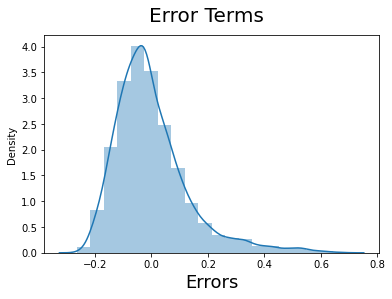

In [454]:

res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

#### Applying the scaling on the test sets

In [455]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

#num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#df_test[num_vars] = scaler.transform(df_test[num_vars])


num_vars1 = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])

# Checking values after scaling
df_test.head()

<ipython-input-455-605b567a1184>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])
C:\Users\vasanth\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\vasanth\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
3916,0.333333,1.0,0.363636,0.086957,0.0,1.000000,0.0,0.000000,0.468085,0.446080,0.59,0.157870,0.195535
306,0.000000,0.0,0.000000,0.956522,0.0,0.666667,1.0,0.333333,0.234043,0.199939,0.65,0.333373,0.056877
5094,1.000000,1.0,0.818182,0.869565,0.0,0.666667,1.0,0.000000,0.425532,0.415313,0.62,0.193018,0.195535
8606,0.666667,1.0,0.454545,0.782609,0.0,0.000000,0.0,0.000000,0.851064,0.723091,0.34,0.298225,0.551189
3151,0.666667,0.0,0.545455,0.869565,0.0,0.166667,1.0,0.000000,0.808511,0.738424,0.59,0.263195,0.332989


In [456]:
df_test.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000,6083.000000
mean,0.502055,0.500247,0.501831,0.502391,0.028604,0.499534,0.687983,0.138199,0.510831,0.470314,0.627245,0.225420,0.195869
std,0.369577,0.500041,0.312150,0.300530,0.166705,0.333148,0.463355,0.210800,0.204303,0.174136,0.193950,0.144819,0.153713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.260870,0.000000,0.166667,0.000000,0.000000,0.340426,0.323010,0.480000,0.122840,0.092037
50%,0.666667,1.000000,0.545455,0.521739,0.000000,0.500000,1.000000,0.000000,0.510638,0.476848,0.630000,0.228047,0.195535
75%,0.666667,1.000000,0.727273,0.739130,0.000000,0.833333,1.000000,0.333333,0.680851,0.615353,0.790000,0.298225,0.209928
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [457]:
df_test1=df_test.copy()

In [458]:
y_test = df_test1.pop('cnt')
X_test = df_test1

X_test.info()



# y_test = df_test.pop('cnt')
# X_test = df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6083 entries, 3916 to 2553
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6083 non-null   float64
 1   yr          6083 non-null   float64
 2   mnth        6083 non-null   float64
 3   hr          6083 non-null   float64
 4   holiday     6083 non-null   float64
 5   weekday     6083 non-null   float64
 6   workingday  6083 non-null   float64
 7   weathersit  6083 non-null   float64
 8   temp        6083 non-null   float64
 9   atemp       6083 non-null   float64
 10  hum         6083 non-null   float64
 11  windspeed   6083 non-null   float64
dtypes: float64(12)
memory usage: 617.8 KB


In [459]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6083 entries, 3916 to 2553
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       6083 non-null   float64
 1   season      6083 non-null   float64
 2   yr          6083 non-null   float64
 3   hr          6083 non-null   float64
 4   holiday     6083 non-null   float64
 5   weekday     6083 non-null   float64
 6   workingday  6083 non-null   float64
 7   weathersit  6083 non-null   float64
 8   temp        6083 non-null   float64
 9   windspeed   6083 non-null   float64
dtypes: float64(10)
memory usage: 522.8 KB


In [460]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm4)

## MODEL EVALUATION


Text(0, 0.5, 'y_pred')

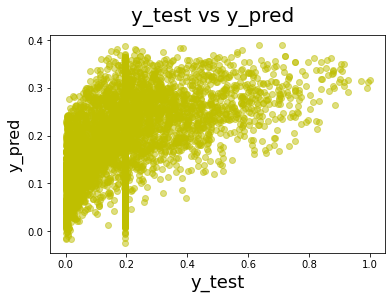

In [464]:
# Plotting y_test and y_pred to understand the spread
# import matplotlib.pyplot as plt
# import numpy as np


fig = plt.figure()
plt.scatter(y_test, y_pred,c='y', alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

## R^2 Value for TEST

In [465]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2343990410158603

### Adjusted R^2 Value for TEST

In [470]:
# We already have the value of R^2 (calculated in above step)

r2=0.2343990410158603

In [467]:
# Get the shape of X_test

X_test.shape

(6083, 9)

In [471]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.2332644438429874